<a href="https://colab.research.google.com/github/surfaceowl/google.colab_machinelearning/blob/master/CNN_to_predict_integers_in_images_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# snippet for uploading local files to colab
# from google.colab import files
# uploaded = files.upload()

In [3]:
# # colab does not persist local libraries, so we have to reinstall; colab requires prefix of `!`
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [4]:
# import core python libraries for analysis
import pandas as pd
import numpy as np

# import graphics
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# enable multiple outputs per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
# import machine learning
import tensorflow as tf

In [6]:
# Import MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
n_train = mnist.train.num_examples # 55,000
n_validation = mnist.validation.num_examples # 5000
n_test = mnist.test.num_examples # 10,000

In [0]:
# define neural network architecture
n_input = 784   # input layer (28x28 pixels)
n_hidden1 = 512 # 1st hidden layer
n_hidden2 = 256 # 2nd hidden layer
n_hidden3 = 128 # 3rd hidden layer
n_output = 10   # output layer (0-9 digits)

learning_rate = 1e-4
n_iterations = 10000
batch_size = 128
dropout = 0.5

In [0]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32) 

In [0]:
# define weights & biases
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}


biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [0]:
# setup each of the layers
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

In [12]:
# setup gradient descent; use tensorflows AdamOptimizer which speeds up convergence by using momentum of descent
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# Training & Testing
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [14]:
# initialize and run model

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# train on mini batches
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob:dropout})

    # print loss and accuracy (per minibatch)
    if i%100==0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
        print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))

Iteration 0 	| Loss = 3.2211995 	| Accuracy = 0.125
Iteration 100 	| Loss = 0.5629972 	| Accuracy = 0.859375
Iteration 200 	| Loss = 0.40736264 	| Accuracy = 0.8671875
Iteration 300 	| Loss = 0.27514684 	| Accuracy = 0.9140625
Iteration 400 	| Loss = 0.50883615 	| Accuracy = 0.8671875
Iteration 500 	| Loss = 0.27862448 	| Accuracy = 0.90625
Iteration 600 	| Loss = 0.4364797 	| Accuracy = 0.8828125
Iteration 700 	| Loss = 0.2810396 	| Accuracy = 0.8984375
Iteration 800 	| Loss = 0.2504645 	| Accuracy = 0.9296875
Iteration 900 	| Loss = 0.3062001 	| Accuracy = 0.921875
Iteration 1000 	| Loss = 0.22203273 	| Accuracy = 0.9296875
Iteration 1100 	| Loss = 0.25439376 	| Accuracy = 0.9296875
Iteration 1200 	| Loss = 0.2426521 	| Accuracy = 0.921875
Iteration 1300 	| Loss = 0.17592339 	| Accuracy = 0.953125
Iteration 1400 	| Loss = 0.3339944 	| Accuracy = 0.9375
Iteration 1500 	| Loss = 0.2163752 	| Accuracy = 0.9375
Iteration 1600 	| Loss = 0.5949689 	| Accuracy = 0.8828125
Iteration 1700 	| 

In [15]:
# now let's run the model on test images
# set keep_prob to 1.0, so we keep all units in the network
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9221


In [0]:
import numpy as np
from PIL import Image
import random           # for selecting random images later

We have  10000  images to work with.




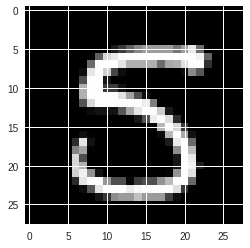

            Prediction for test image: 5 



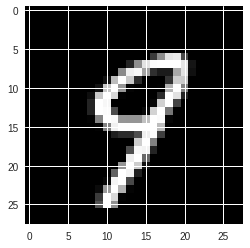

            Prediction for test image: 9 



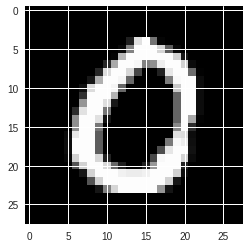

            Prediction for test image: 0 



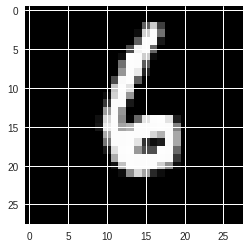

            Prediction for test image: 6 



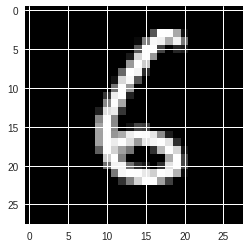

            Prediction for test image: 6 



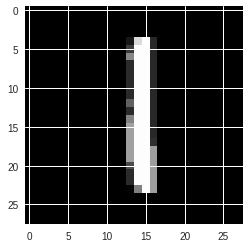

            Prediction for test image: 1 



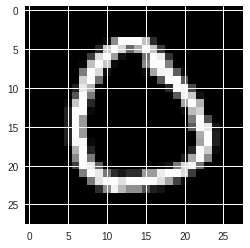

            Prediction for test image: 0 



In [34]:
# pick random image from the entire set, display image and our prediction
n_images_to_show=7

# Get images from test set
test_images_totalnum = len(mnist.test.images)
test_images = mnist.test.images

print("We have ",test_images_totalnum , " images to work with.\n\n")

for i in range(n_images_to_show):
    image_to_pick = random.randint(1,test_images_totalnum)
    
    img = np.reshape(test_images[image_to_pick], [28, 28])
   
    plt.imshow(np.reshape(test_images[image_to_pick], [28, 28]), cmap='gray')
    plt.show()
    
    img_flat = img.flatten().reshape(784)
    
    prediction = sess.run(tf.argmax(output_layer,1), feed_dict={X: [img_flat]})
    print ("            Prediction for test image:", np.squeeze(prediction), "\n")

In [27]:

image_to_pick

9622